# Description of the Dataset

This dataset is for ABC Multistate bank with following columns: 
1.	customer_id, unused variable.
2.	credit_score, used as input.
3.	country, used as input.
4.	gender, used as input.
5.	age, used as input.
6.	tenure, used as input.
7.	balance, used as input.
8.	products_number, used as input.
9.	credit_card, used as input.
10.	active_member, used as input.
11.	estimated_salary, used as input.
12.	churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

# 1. Load Libraries

In [ ]:
# Load Required Libraries
import pandas as pd; 
import numpy as np; 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.figure import Figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import param
import hvplot.pandas
import panel as pn
pn.extension()
mpl.use('agg')


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
# 2. Reading Data From CSV

# Read Data from csv
csv_file = "data/Dataset2.csv"
df = pd.read_csv(csv_file)

In [3]:
# 3. Understanding the dataset

# 3. Understanding the dataset

In [4]:
# peek into dataset
df.head()
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0,2,1,0,9627064,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,5736961,1,1,1,10169977,0
9997,9998,15584532,Liu,709,France,Female,36,7,0,1,0,1,4208558,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,7507531,2,1,0,9288852,1
9999,10000,15628319,Walker,792,France,Female,28,4,13014279,1,1,0,3819078,0


In [5]:
# See all the columns in the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# General Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  int64 
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  int64 
 13  Exited           10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [7]:
# check number of null values present in each features
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# get statistical information of dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,6.980471e+06,1.530200,0.70550,0.515100,9.089385e+06,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,6.285896e+06,0.581654,0.45584,0.499797,6.128208e+06,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,5.230000e+02,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


# 3. Dropping unnecessary columns and Missing Values

In [9]:
# Visualizing Missing Values
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
# Checking to missing value
df.isna().sum()

# Droping Missing Value
# df.dropna()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In this dataset, there is no missing values. Therefore, it is not necessary to remove missng values.

# 4. Preliminary Data Analysis

In [10]:
# How many of the customer has credit card?
# How many are active member?
# How many customers have existed the bank?
# Dataset based on gender?
# Data distribution by Age?
# Propotion of different income level
# Distribution of Tottal NumOfProducts
# Distribution of Credit Limit
# Proportion of existed vs not existed customers
# Visualizing Missing Values

# 5. Data Visualization with different charts & Tools

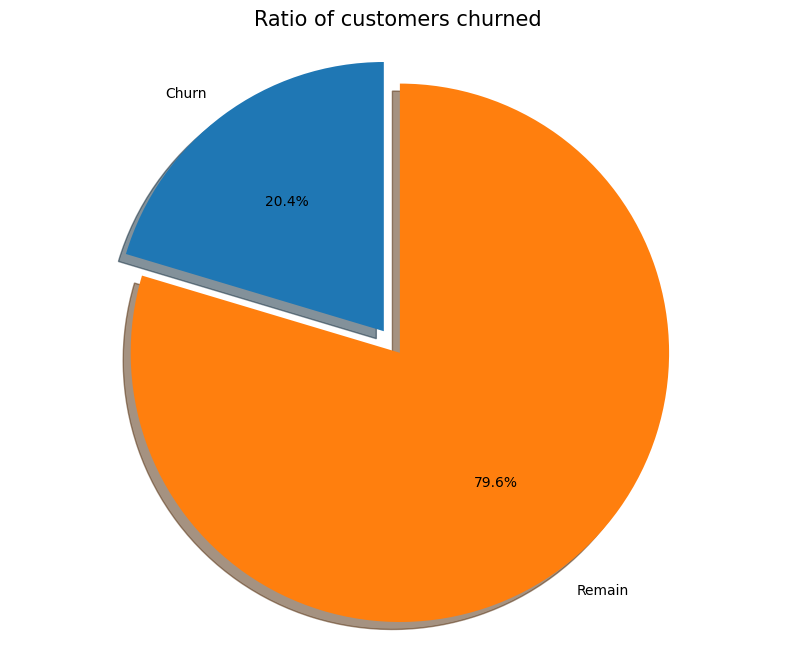

In [11]:
labels = 'Churn', 'Remain'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax1.axis('equal')
plt.title("Ratio of customers churned", size = 15 )
plt.show()

Hence, around 20% of consumers have churned. Therefore, the baseline model may predict that 20% of consumers would leave. However, considering that 20% is a tiny amount, we must guarantee that the selected model successfully predicts this 20% since it is more critical for the bank to identify and retain this group than to anticipate the remaining clients reliably.

In [12]:
df["Exited"][df["Exited"]== 0].groupby(by=df["Gender"]).count()

Gender
Female    3404
Male      4559
Name: Exited, dtype: int64

In [13]:
df["Exited"][df["Exited"]== 1].groupby(by=df["Gender"]).count()

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

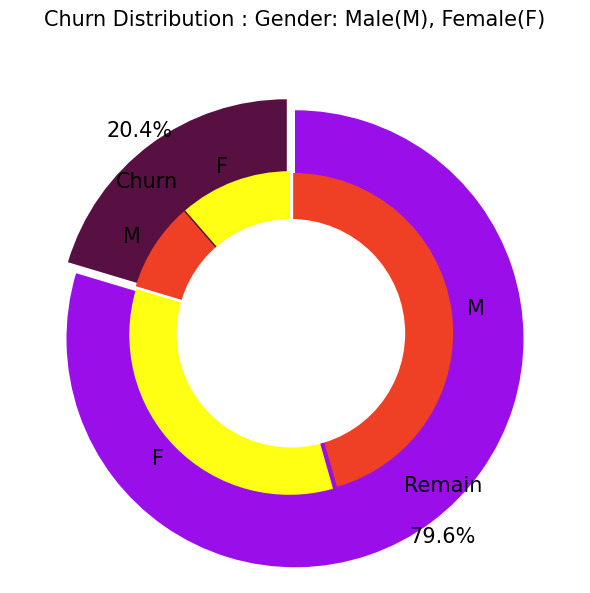

In [14]:
plt.figure(figsize=(6, 6))
labels =["Churn","Remain"]
values = [2037,7963]
labels_gender = ["F","M","F","M"]
sizes_gender = [1139,898 , 3404,4559]
colors = ['#580F41', '#9A0EEA']
colors_gender = ['#FFFF14','#EF4026', '#FFFF14','#EF4026']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution : Gender: Male(M), Female(F)', fontsize=15, y=1.1 )

 
plt.axis('equal')
plt.tight_layout()
plt.show()

According to the research, female customers have somewhat more churn than male customers. Yet, we cannot assume that gender is a major factor in influencing customer churn without completing statistical studies.It is crucial to remember that the churn rate may also be influenced by characteristics such as age, credit score, tenure, balance, and amount of bought items. To acquire a deeper knowledge of customer churn, it is vital to analyse the aforementioned aspects.

C:\Users\pishro\AppData\Local\Temp\ipykernel_15780\1605989623.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=0, vmax=1,annot=True , cmap='rainbow' )


<AxesSubplot: >

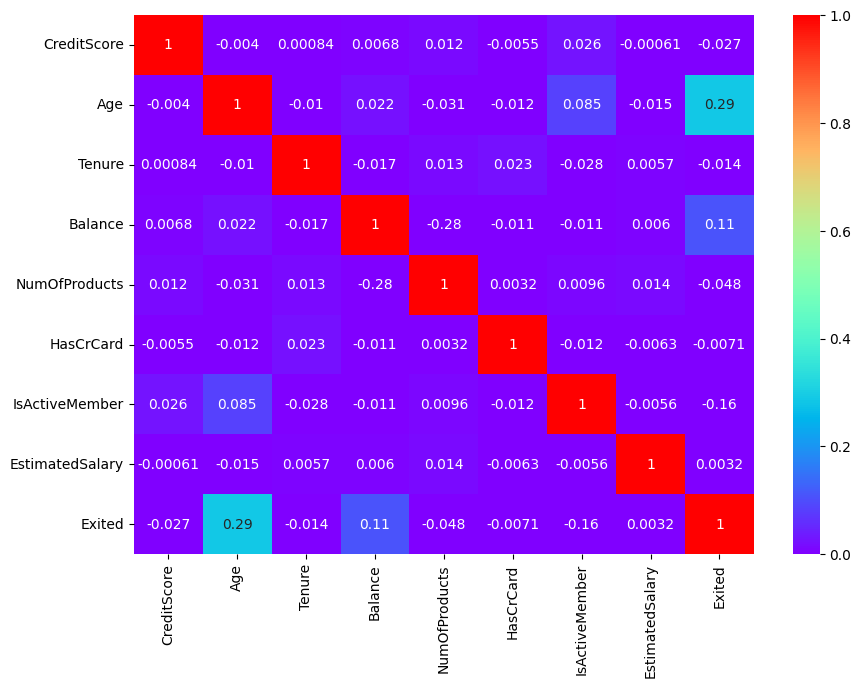

In [15]:
plt.figure(figsize=(10,7)),
sns.heatmap(df.corr(),vmin=0, vmax=1,annot=True , cmap='rainbow' )

The correlation coefficient runs from -1 to 1, where 1 represents a positive correlation, 0 represents no correlation, and -1 represents a negative correlation.

we may note that age has a correlation of 0.29 with customer attrition. This indicates that older customers are less likely to leave than younger customers.

Conversely, tenure has a negative association of -0.014 with employee turnover. This indicates no direct correlation between the length of time a client has been with a bank and their chance of leaving.

The correlation coefficient between Balance and Churn is 0.11, showing a slight positive association. This indicates that customers with more significant amounts are less likely to leave than those with more negligible levels.

Quantity of goods and churn has a slight negative association value of -0.048. This indicates that customers who have bought more bank products are somewhat less likely to churn.

A very modest negative link exists between churn and having a credit card, with a correlation value of -0.0071. This indicates that having a credit card has no discernible effect on client attrition.

The correlation coefficient between active membership and churn is -0.16, showing a slight negative association. This indicates that active customers who use the bank's goods and services are less likely to leave than inactive customers.

Age, balance, the quantity of items and active membership all show minor correlations with customer turnover, but tenure and owning a credit card have no link.

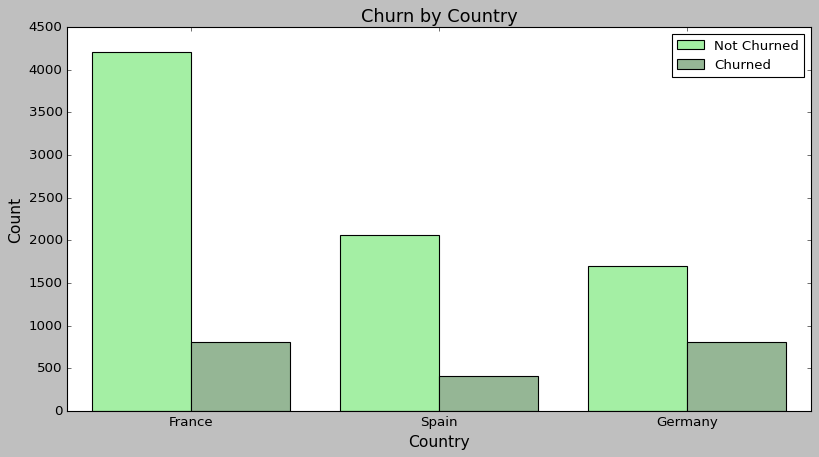

In [91]:
plt.style.use('classic')
plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', hue='Exited', data=df , palette=['palegreen', 'darkseagreen'])
plt.title('Churn by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Not Churned', 'Churned'], fontsize=12)
plt.show()


he distribution of non-churned customers per nation is as follows: Customers from France make up 4,204, 1,695 and 2,064 of them. The distribution of churned customers by nation, on the other hand, is as follows: 810 customers are from France, 814 customers are from Germany, and 413 customers are from Spain.

These findings reveal that the majority of customers in the sample did not churn, with France having the greatest proportion of non-churning customers. Nonetheless, there are significant numbers of churned customers from each of the three nations, demonstrating that churn-inducing variables may exist throughout the client base.

C:\Users\pishro\AppData\Local\Temp\ipykernel_15780\478991294.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



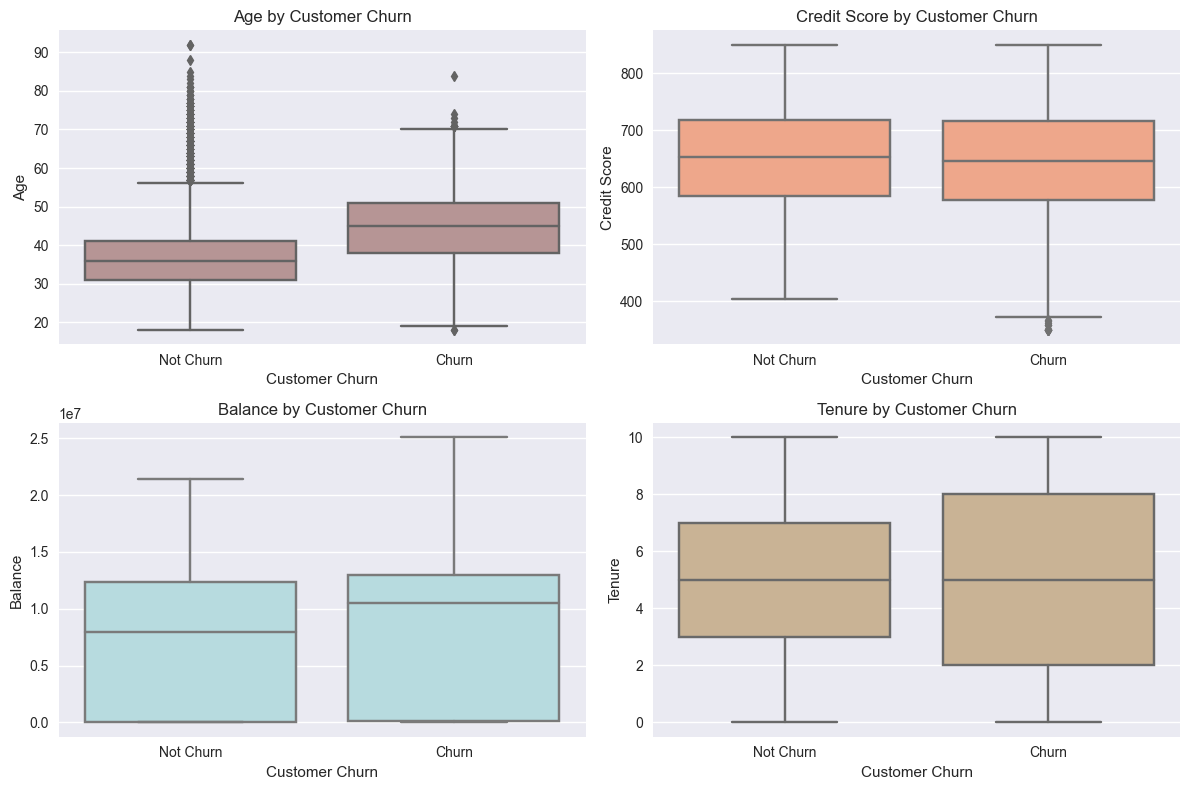

In [89]:
plt.style.use('seaborn')


churned = df[df['Exited'] == 1]
not_churned = df[df['Exited'] == 0]


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


sns.boxplot(x='Exited', y='Age', data=df, ax=axs[0, 0], color='rosybrown')
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axs[0, 1], color='lightsalmon')
sns.boxplot(x='Exited', y='Balance', data=df, ax=axs[1, 0], color='powderblue')
sns.boxplot(x='Exited', y='Tenure', data=df, ax=axs[1, 1], color='tan')

axs[0, 0].set_xticklabels(['Not Churn', 'Churn'])
axs[0, 1].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 0].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 1].set_xticklabels(['Not Churn', 'Churn'])

axs[0, 0].set_xlabel('Customer Churn')
axs[0, 0].set_ylabel('Age')
axs[0, 0].set_title('Age by Customer Churn')

axs[0, 1].set_xlabel('Customer Churn')
axs[0, 1].set_ylabel('Credit Score')
axs[0, 1].set_title('Credit Score by Customer Churn')

axs[1, 0].set_xlabel('Customer Churn')
axs[1, 0].set_ylabel('Balance')
axs[1, 0].set_title('Balance by Customer Churn')

axs[1, 1].set_xlabel('Customer Churn')
axs[1, 1].set_ylabel('Tenure')
axs[1, 1].set_title('Tenure by Customer Churn')

plt.tight_layout()
plt.show()

The boxplot depicts the distribution of customer age by two customer churn categories, "Not Churned" and "Churned." The median age of "Not Churned" customers is roughly 35, with the first quartile below 20 and the third quartile around 40. This is shown by the boxplot. The median age of "Churned" clients is roughly 45 years old, with the first quartile around 20 and the third quartile around 70 years old, according to the boxplot.The boxplot indicates that the age distribution of "Churned" customers is more dispersed than that of "Not Churned" customers. In comparison to "Not Churned" clients, "Churned" consumers have a broader age range, with a greater share of older customers.

C:\Users\pishro\AppData\Local\Temp\ipykernel_15780\3947406264.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



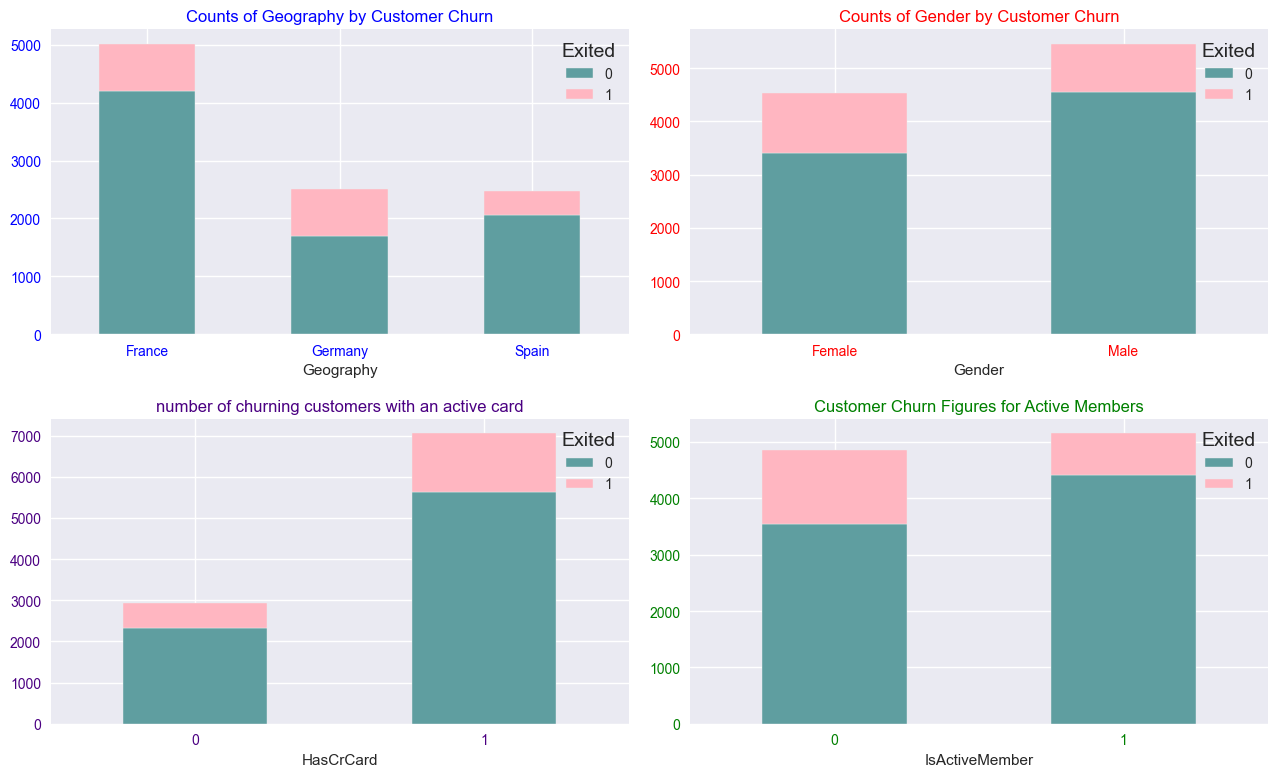

In [78]:

plt.style.use('seaborn')

colors = ['#5f9ea0', '#ffb6c1']


fig, axes = plt.subplots(2, 2, figsize=(13,8))


geography_counts = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)
geography_counts.plot(kind='bar', stacked=True, ax=axes[0, 0], rot=0, color=colors)
axes[0, 0].set_title('Counts of Geography by Customer Churn', color='blue')
axes[0, 0].spines['bottom'].set_color('blue')
axes[0, 0].spines['left'].set_color('blue')
axes[0, 0].tick_params(axis='x', colors='blue')
axes[0, 0].tick_params(axis='y', colors='blue')


gender_counts = df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', stacked=True, ax=axes[0, 1], rot=0, color=colors)
axes[0, 1].set_title('Counts of Gender by Customer Churn', color='red')
axes[0, 1].spines['bottom'].set_color('red')
axes[0, 1].spines['left'].set_color('red')
axes[0, 1].tick_params(axis='x', colors='red')
axes[0, 1].tick_params(axis='y', colors='red')


has_credit_counts = df.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)
has_credit_counts.plot(kind='bar', stacked=True, ax=axes[1, 0], rot=0, color=colors)
axes[1, 0].set_title('number of churning customers with an active card', color='#4B0082')
axes[1, 0].spines['bottom'].set_color('#4B0082')
axes[1, 0].spines['left'].set_color('#4B0082')
axes[1, 0].tick_params(axis='x', colors='#4B0082')
axes[1, 0].tick_params(axis='y', colors='#4B0082')


active_member_counts = df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)
active_member_counts.plot(kind='bar', stacked=True, ax=axes[1, 1], rot=0, color=colors)
axes[1, 1].set_title('Customer Churn Figures for Active Members', color='green')
axes[1, 1].spines['bottom'].set_color('green')
axes[1, 1].spines['left'].set_color('green')
axes[1, 1].tick_params(axis='x', colors='green')
axes[1, 1].tick_params(axis='y', colors='green')


fig.tight_layout()


plt.show()




# 6. Checking for Outliers 

In [ ]:
#list numeric column name
%matplotlib inline

columns = []
count = 0
for x in df.columns:
    if df.dtypes[count] != object:
        columns.append(x)
        count = count+1
    else:
        count = count+1

print(columns)

#boxplot to visulize an outlier

fig, axs = plt.subplots(ncols=len(columns), figsize=(20,5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

# 7. Remove Outliers

In [ ]:
#removing outlier rows using IQR method

Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['CreditScore'] < (Q1 - 1.5 * IQR)) | (df['CreditScore'] > (Q3 + 1.5 * IQR)))]



# 8. Converting categorical data into Numerical data using Label Encoder

